#BigBasket Exploratory Data Analysis
- Dataset can be found in *https://www.kaggle.com/datasets/surajjha101/bigbasket-entire-product-list-28k-datapoints*

#Importing and copying the dataset

In [1]:
import pandas as pd

In [2]:
data = "BigBasket Products.csv"

In [4]:
data = pd.read_csv(data)

In [5]:
df = data.copy()

In [6]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,discount,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,0.00,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,0.00,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,52.40,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,15.34,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,0.00,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


#Data preparation and cleaning

###Filling NaN values

In [7]:
df.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'discount', 'type', 'rating', 'description'],
      dtype='object')

In [8]:
df.isna().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
discount           0
type               0
rating          8626
description      115
dtype: int64

In [9]:
df.rating.fillna(0, inplace = True)
df['product'].fillna('No name', inplace = True)
df.description.fillna("No description", inplace = True)
df.brand.fillna("No brand name", inplace = True)

In [10]:
df.isna().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
discount        0
type            0
rating          0
description     0
dtype: int64

###Dropping redundant columns

In [11]:
columns_to_drop = ['index']
df.drop(columns_to_drop, axis = 1, inplace = True)

###Finding and removing the duplicates

In [12]:
df[df.duplicated()]

,product,category,sub_category,brand,sale_price,market_price,discount,type,rating,description
243,Glass Amaze Air Tight Jar - Pink,"Kitchen, Garden & Pets",Crockery & Cutlery,Iveo,289.0,358.0,19.27,Glassware,0.0,These glass Jars are beautiful looking with it...
296,Organic Idly Podi - Ginger,Snacks & Branded Foods,Ready To Cook & Eat,Aaha Oho,75.0,75.0,0.00,Breakfast & Snack Mixes,3.9,This is a Ginger flavour Idly Podi that can be...
1887,100% Melamine 3D Soup Spoon - Blue,"Kitchen, Garden & Pets",Crockery & Cutlery,Iveo,264.0,264.0,0.00,Plates & Bowls,0.0,Iveos soup spoons are used to stir and drink t...
2139,Classic Sandalwood & Tulsi Hand Wash,Beauty & Hygiene,Bath & Hand Wash,Santoor,209.0,209.0,0.00,Hand Wash & Sanitizers,3.8,Presenting Santoor hand wash with a blend of n...
2952,Chai / Coffee/ Tea-Milk Mug - Sea With Ship Print,"Kitchen, Garden & Pets",Crockery & Cutlery,Rslee,299.0,299.0,0.00,"Cups, Mugs & Tumblers",0.0,This lovely multicoloured mug is an appealing ...
...,...,...,...,...,...,...,...,...,...,...
27178,Rose Gold Beauty Oil,Beauty & Hygiene,Skin Care,The Beauty Co.,975.0,1250.0,22.00,Face Care,0.0,"Rose Gold Oil! Yes, these are the three words ..."
27371,"Adult Diapers Economy, Medium",Beauty & Hygiene,Health & Medicine,Friends,425.0,425.0,0.00,Adult Diapers,0.0,Friends Economy Adult Diaper comes with an ant...
27375,Taft Ultimate Wax,Beauty & Hygiene,Hair Care,Schwarzkopf,425.0,425.0,0.00,Hair Care & Styling,0.0,Ultimate strongest taffeta-stop for 100% fixat...
27412,Whisky Tumblers/Glass,"Kitchen, Garden & Pets",Crockery & Cutlery,Yera,319.0,385.0,17.14,Glassware,0.0,Yera is the pioneer in India’s glass Industry ...


In [13]:
df.duplicated(subset= "product", keep = "first").sum()

4014

In [14]:
df.drop_duplicates(subset=['product'], keep=False, inplace = True)

###Basic statistics

In [15]:
df.describe()

,sale_price,market_price,discount,rating
count,20567.000000,20567.000000,20567.000000,20567.000000
mean,334.654588,395.518907,11.549335,2.690791
std,499.424880,596.780110,14.776579,1.927472
min,3.000000,3.000000,0.000000,0.000000
25%,99.000000,110.000000,0.000000,0.000000
50%,199.000000,230.000000,5.000000,3.800000
75%,375.000000,449.000000,20.000000,4.200000
max,12500.000000,12500.000000,82.510000,5.000000


In [16]:
df.shape

(20567, 10)

In [17]:
df.dtypes

product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
discount        float64
type             object
rating          float64
description      object
dtype: object

#Data Exploratory and Visualization
- product
- sale price, market price
- category

In [18]:
df.columns

Index(['product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'discount', 'type', 'rating', 'description'],
      dtype='object')

In [19]:
corr = df.corr()

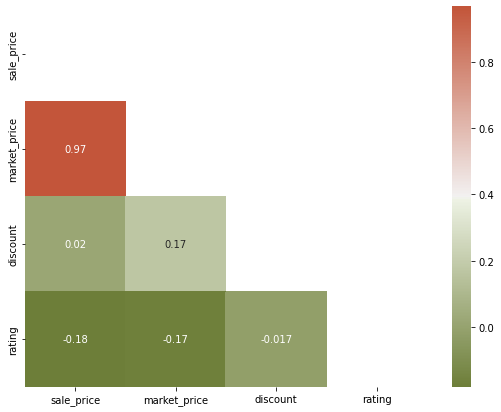

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(9, 7))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

###Product

In [21]:
product = df.product

In [22]:
len(df['product'].unique())

20567

In [23]:
df[df.rating == 5.0]

,product,category,sub_category,brand,sale_price,market_price,discount,type,rating,description
12,"Face Wash - Oil Control, Active",Beauty & Hygiene,Skin Care,Oxy,110.00,110.0,0.00,Face Care,5.0,This face wash deeply cleanses dirt and impuri...
24,Veggie Cutter,"Kitchen, Garden & Pets",Kitchen Accessories,IRICH,195.00,195.0,0.00,Choppers & Graters,5.0,"Food Grade High Quality Plastic, Keep and stor..."
44,Plain Green Olives,Gourmet & World Food,Tinned & Processed Food,Figaro,179.00,179.0,0.00,"Olive, Jalapeno, Gherkin",5.0,Olives are small fruits that grow on olive tre...
92,Topp Up Milk - Elaichi,"Bakery, Cakes & Dairy",Dairy,Gowardhan,80.01,90.0,11.10,"Flavoured, Soya Milk",5.0,Gowardhan Topp-Up Milk is made by 100 % of cow...
111,SPF 15 Sunscreen Lotion,Beauty & Hygiene,Skin Care,Elovera,209.30,299.0,30.00,Body Care,5.0,Elovera SPF Lotion is a specially formulated s...
...,...,...,...,...,...,...,...,...,...,...
27445,Organic Virgin Coconut Oil - Pure Coldpressed ...,Beauty & Hygiene,Hair Care,Morpheme Remedies,427.00,449.0,4.90,Hair Oil & Serum,5.0,"Virgin coconut oil is a pure, unrefined, cold ..."
27478,Apple Cider Vinegar - Raw Unfiltered Unpasteur...,Gourmet & World Food,Oils & Vinegar,Zoe,449.10,499.0,10.00,Balsamic & Cider Vinegar,5.0,"ZOE Apple Cider Vinegar (ZOE ACV) with Ginger,..."
27502,Forest Honey - Wild,Snacks & Branded Foods,"Spreads, Sauces, Ketchup",Organic Nation,350.00,350.0,0.00,Honey,5.0,Honey Produces A Refreshing Surge Of Energy An...
27507,Extra Crisp Sweet Corn,Gourmet & World Food,Tinned & Processed Food,Daucy,202.50,225.0,10.00,Beans & Pulses,5.0,We bring for you Europe’s leading brand of can...


In [24]:
df['brand'].value_counts()

BB Home             355
Fresho              242
bb Royal            232
DP                  230
Fresho Signature    169
                   ... 
Pavizham              1
Bacto-V               1
Slice                 1
Healing Touch         1
Baron De Bercy        1
Name: brand, Length: 2170, dtype: int64

In [25]:
df[df.brand == 'BB Home']

,product,category,sub_category,brand,sale_price,market_price,discount,type,rating,description
85,Jupiter Water/Juice Glass Tumbler,"Kitchen, Garden & Pets",Crockery & Cutlery,BB Home,479.0,629.0,23.85,Glassware,0.0,B Home glasses are crafted and manufactured in...
117,"Steel Bowl/Vati/Katori - No. 4, Chutney","Kitchen, Garden & Pets",Steel Utensils,BB Home,69.0,159.0,56.60,Bowls & Vessels,0.0,BB Home Chutney Bowl can be used to serve all ...
157,"Octa Plastic Pet Water Bottle - Light Blue, Na...","Kitchen, Garden & Pets",Storage & Accessories,BB Home,25.0,42.0,40.48,Water & Fridge Bottles,0.0,These BB Home pet water bottles are made of hi...
228,"Steel Deep Dabba/Storage Container - No. 12, P...","Kitchen, Garden & Pets",Steel Utensils,BB Home,249.0,339.0,26.55,Steel Storage Containers,0.0,BB Home Canister/Container Deep Dabba is a lon...
669,Steel Lunch/Tiffin Box With 4 Containers - 8X4,"Kitchen, Garden & Pets",Steel Utensils,BB Home,349.0,599.0,41.74,Steel Lunch Boxes,0.0,BB Home Tiffin Sada keeps food fresh for hours...
...,...,...,...,...,...,...,...,...,...,...
27010,"Body Bath Loofah Face Towel Hangable, Assorted...",Beauty & Hygiene,Bath & Hand Wash,BB Home,165.0,265.0,37.74,Bathing Accessories,4.0,"Amazingly absorbent, this towel demolishes dus..."
27227,"Steel Deep Dabba Storage Container - No. 11, D...","Kitchen, Garden & Pets",Steel Utensils,BB Home,199.0,289.0,31.14,Steel Storage Containers,0.0,BB Home Canister/Container Deep Dabba is a lon...
27232,Steel Parsi Lota Water Container,"Kitchen, Garden & Pets",Steel Utensils,BB Home,199.0,299.0,33.44,Plates & Tumblers,4.4,"BB Home Lota-Pot is ideal for storing water, m..."
27387,Premium Plastic Bathing Mug - Red,Cleaning & Household,Bins & Bathroom Ware,BB Home,58.0,70.0,17.14,Buckets & Mugs,4.2,"This bathing mug from bb Home is sturdy, light..."


###Sale and market price

In [26]:
sale = df.sale_price
market = df.market_price

In [27]:
df.nlargest(5, 'sale_price')


,product,category,sub_category,brand,sale_price,market_price,discount,type,rating,description
25301,Bravura Clipper,"Kitchen, Garden & Pets",Pet Food & Accessories,Wahl,12500.00,12500.0,0.00,Pet Cleaning & Grooming,0.0,The bravura clipper is a must-have clipper for...
21761,Pet Food - N&D Team Breeder Puppy Top Farmina,"Kitchen, Garden & Pets",Pet Food & Accessories,Farmina,10090.00,10090.0,0.00,Pet Meals & Treats,0.0,Dog Food Adult Health Nutritional Dog Food.
12669,Epilator SE9-9961 Legs-Body-Face,Beauty & Hygiene,Feminine Hygiene,Braun,8184.44,10769.0,24.00,Hair Removal,0.0,This cordless epilator has a sonic exfoliation...
23082,"Gas Stove-4 Burner Royale Plus Schott Glass, B...","Kitchen, Garden & Pets",Cookware & Non Stick,Prestige,7999.00,12245.0,34.68,Gas Stove,0.0,Prestige Royale Plus Gas Stove. Add a Touch of...
25797,"4 Burner Gas Stove - Marvel Plus Glass Tables,...","Kitchen, Garden & Pets",Cookware & Non Stick,Prestige,7270.00,9695.0,25.01,Gas Stove,0.0,Prestige Marvel Plus Gas Stove . A Smart and C...


In [28]:
df.nsmallest(5, 'sale_price')

,product,category,sub_category,brand,sale_price,market_price,discount,type,rating,description
21312,Serum,Beauty & Hygiene,Hair Care,Livon,3.0,3.0,0.0,Hair Oil & Serum,2.5,"Instantly Softens and Smoothens Dry, Rough, Ta..."
2761,Orbit Sugar-Free Chewing Gum - Lemon & Lime,Snacks & Branded Foods,Chocolates & Candies,Wrigleys,5.0,5.0,0.0,Mints & Chewing Gum,4.2,"With Orbit Sugarfree Chewing Gums, there's no ..."
11435,Exam Standard Scale,Cleaning & Household,Stationery,Camlin,5.0,5.0,0.0,Exam Pads & Pencil Box,0.0,Highly Transparent plastic scale with precise ...
14538,Cadbury Perk - Chocolate Bar,Snacks & Branded Foods,Chocolates & Candies,Cadbury,5.0,5.0,0.0,Chocolates,4.2,Perk is a combination of crisp wafer and delic...
14603,50-50 Timepass Biscuits,Snacks & Branded Foods,Biscuits & Cookies,Britannia,5.0,5.0,0.0,Salted Biscuits,3.9,Britannia 50-50 biscuits are very sugary and s...


###Category

In [29]:
df.category.unique()

array(['Kitchen, Garden & Pets', 'Cleaning & Household',
       'Beauty & Hygiene', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods',
       'Bakery, Cakes & Dairy', 'Beverages', 'Baby Care',
       'Fruits & Vegetables', 'Eggs, Meat & Fish'], dtype=object)

In [38]:
items_in_category = df['category'].value_counts()

In [33]:
beauty = df[df.category == 'Beauty & Hygiene']


In [40]:
highest_beauty = beauty.nlargest(1, 'sale_price')

In [42]:
print(items_in_category)
highest_beauty

Beauty & Hygiene            5978
Gourmet & World Food        3596
Kitchen, Garden & Pets      2879
Cleaning & Household        2197
Snacks & Branded Foods      2104
Foodgrains, Oil & Masala    1527
Bakery, Cakes & Dairy        667
Beverages                    648
Baby Care                    491
Eggs, Meat & Fish            325
Fruits & Vegetables          155
Name: category, dtype: int64


,product,category,sub_category,brand,sale_price,market_price,discount,type,rating,description
12669,Epilator SE9-9961 Legs-Body-Face,Beauty & Hygiene,Feminine Hygiene,Braun,8184.44,10769.0,24.0,Hair Removal,0.0,This cordless epilator has a sonic exfoliation...


# Questions and Answers

##which brand have most products? and what is their most expensive product?
`BB Home have the most products in the list and their most expensive product costs 369USD`

##what brand is the highest rated product and what the product is?
`there are over 1000 products with 5 out of 5 rating`

##what are the rating of top 5 most expensive products?
`All of them are missing rating value`

##what are the rating of top 5 cheapest products?

In [ ]:
df.nsmallest(5, 'sale_price')

,product,category,sub_category,brand,sale_price,market_price,discount,type,rating,description
26976,Curry Leaves,Fruits & Vegetables,Herbs & Seasonings,Fresho,2.45,15.0,83.67,Indian & Exotic Herbs,0.0,"With dark green and glossy appearance, curry l..."
21312,Serum,Beauty & Hygiene,Hair Care,Livon,3.00,3.0,0.00,Hair Oil & Serum,2.5,"Instantly Softens and Smoothens Dry, Rough, Ta..."
2761,Orbit Sugar-Free Chewing Gum - Lemon & Lime,Snacks & Branded Foods,Chocolates & Candies,Wrigleys,5.00,5.0,0.00,Mints & Chewing Gum,4.2,"With Orbit Sugarfree Chewing Gums, there's no ..."
2978,Sugar Free Chewing Gum - Mixed Fruit,Snacks & Branded Foods,Chocolates & Candies,Orbit,5.00,5.0,0.00,Mints & Chewing Gum,4.2,There are occasions in everyone’s day when the...
3445,Marie Light Biscuits - Active,Snacks & Branded Foods,Ready To Cook & Eat,Sunfeast,5.00,5.0,0.00,Breakfast & Snack Mixes,4.5,EAN Code: 8901725114848 Country of origin: In...


##how many products are in each category? what category have most products and what is the most expensive product of that category?

In [43]:
print(items_in_category)
highest_beauty

Beauty & Hygiene            5978
Gourmet & World Food        3596
Kitchen, Garden & Pets      2879
Cleaning & Household        2197
Snacks & Branded Foods      2104
Foodgrains, Oil & Masala    1527
Bakery, Cakes & Dairy        667
Beverages                    648
Baby Care                    491
Eggs, Meat & Fish            325
Fruits & Vegetables          155
Name: category, dtype: int64


,product,category,sub_category,brand,sale_price,market_price,discount,type,rating,description
12669,Epilator SE9-9961 Legs-Body-Face,Beauty & Hygiene,Feminine Hygiene,Braun,8184.44,10769.0,24.0,Hair Removal,0.0,This cordless epilator has a sonic exfoliation...
